<h1 style="text-decoration :underline;color:red">Etude du dataset atp_data.csv </h1>

<p style="color:blue">    Le jeu de données fourni présente une série de matchs de tennis joués à une période donnée. Des informations sont données concernant ces matchs telles que le type de surface joué, les gagnants et perdants des matchs, les rangs mondiaux de ces joueurs ainsi que leur cote sur 2 sites de paris ( PS et B365).
    Les côtes des paris sportifs pour un match sont définies et calculées par les bookmakers en fonction de leurs estimations des probabilités de survenance de l'évènement en se basant notamment sur des données statistiques, l'historique des rencontres et de manière générale toutes les informations disponibles pertinentes. Elle tient également compte de la répartition (prévisionnelle ou réelle) des sommes misées par les parieurs.   Les cotes proposées peuvent donc varier au cours du temps en fonction de ces critères.
    Notre objectif pour ce projet est d’essayer de battre les algorithmes de ces bookmakers sur l’estimation de la probabilité d’un joueur gagnant un match.
    Nous souhaitons étudier dans ce travail les axes de ces estimations sur différents matchs de tennis ainsi que les paramètres de ces estimations.
    Est-ce que le rang du joueur a une incidence directe sur le sort du match ? Est ce que les cotes des paris sportifs sont des indices pour déterminer le résultat d’un match ?</p>



<hr>
<h2 style="text-decoration :underline;color:green">1 Description du projet</h2>

<p style="color:blue">Le projet nous amène à étudier un échantillon de taille (combien exactement ?) qui constituera la population d'étude. L'étude sera faite selon les méthodes enseignées dans le module de statistiques descriptives enseigné chez Data Scientest.</p>

<p style="color:blue">Ce rapport présente les résultats, ainsi que leur interprétation concrète effectuée par notre groupe. Le travail effectué expose de cette manière l'utilisation d'outils pour répondre à une problématique se rapportant au jeu de données.</p>



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from bokeh.plotting import figure, show,output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.models.widgets import Panel, Tabs
pd.set_option('max_columns', 25)

output_notebook()

df = pd.read_csv("atp_data.csv")

Loading BokehJS ...

<hr>
<h2 style="text-decoration :underline;color:green"> 2 Découverte rapide du dataframe </h2>

In [6]:
#Visualisation des premières lignes
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [7]:
#information sur les différentes variables du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         44708 non-null  int64         
 1   Location    44708 non-null  object        
 2   Tournament  44708 non-null  object        
 3   Date        44708 non-null  datetime64[ns]
 4   Series      44708 non-null  object        
 5   Court       44708 non-null  object        
 6   Surface     44708 non-null  object        
 7   Round       44708 non-null  object        
 8   Best of     44708 non-null  int64         
 9   Winner      44708 non-null  object        
 10  Loser       44708 non-null  object        
 11  WRank       44708 non-null  int64         
 12  LRank       44708 non-null  int64         
 13  Wsets       44521 non-null  float64       
 14  Lsets       44521 non-null  float64       
 15  Comment     44708 non-null  object        
 16  PSW         32743 non-

In [5]:
#conversion de la date en datetime
df.Date = pd.to_datetime(df["Date"])

In [8]:
#vérification de la présence de doublons
df.duplicated().sum()

0

In [9]:
#fonctions permettant d'analyser la composition du dataframe
from pandas.api.types import is_numeric_dtype, is_string_dtype, is_datetime64_any_dtype
from IPython.display import display

def first_infos(df):

    n_cols = len(df.columns)
    n_rows = len(df)
    n_duplicates = df.duplicated().sum()
    n_na = df.isna().sum().sum()

    return(n_cols, n_rows, n_duplicates, n_na)
def print_infos(df, n_num, n_cat, n_text, n_date):

    cols, rows, duplicates, na = first_infos(df)

    print('Dataframe :\n\t' + str(rows) + ' Rows \n \t' +
          str(na) + ' Missing values\n\t' +
          str(duplicates) + ' Duplicates\n \t' +
          str(cols) + ' Features\n \t' +
          str(n_cat) + ' Categorical\n \t' +
          str(n_num) + ' Numerical\n \t' +
          str(n_text) + ' Text\n \t' +
          str(n_date) + ' Date')
    
def alerts(df):

    # seuils à modifier en fonction des données
    thresh_na = 0.25
#     Pour savoir si il y a pas trop de fois la meme modalité :
    thresh_balance = 0.8 

    for col in df.columns:
        if (df[col].count()/len(df)) < thresh_na:
            print('\nThe feature ' + col + ' contains too much missing values!')
            
#             On prend la preiere valeur du value count qui est la plus fréquente :
        if df[col].value_counts(normalize=True).values[0] > thresh_balance:
            print('\nThe feature ' + col + ' is Imbalanced. Try to fix it !')
def quality_check(df):

    # On initialise les variables qui comptabiliseront le nombre de chaque type

    n_text = 0
    n_num = 0
    n_cat = 0
    n_date = 0


    data_qlt_df = pd.DataFrame(index=np.arange(0, len(df.columns)),
                               columns=('column_name', 'col_data_type', 'non_null_values', '%_non_null',
                                        'unique_values_count', 'column_type')
                               )

    for ind, col in enumerate(df.columns):
        # On compte le nombre de valeurs uniques par variable
        col_unique_count = df[col].nunique()

        # On compte le nombre de valeurs non nulles
        non_null = df[col].count()

        # On calcule le pourcentage de valeurs non nulles
        p_non_null = (df[col].count()/len(df))*100

        # On associe à chaque colonne un type en fonction de seuils arbitraires
        if is_datetime64_any_dtype(df[col]):
            col_type = 'Date'
            n_date += 1
        elif is_numeric_dtype(df[col]) & (col_unique_count > 50):
            col_type = 'Numerical'
            n_num += 1
        elif (is_string_dtype(df[col])) & (col_unique_count > 100):
            col_type = 'Text'
            n_text += 1
        else:
            col_type = 'Categorical'
            n_cat += 1

        data_qlt_df.loc[ind] = [col,
                                df[col].dtype,
                                non_null,
                                p_non_null,
                                col_unique_count,
                                col_type
                                ]

    # On utilise la transposé de describe() pour obtenir les statistiques sur les variables numériques
    raw_num_df = df.describe().T.round(2)

    # Puis on merge le résultat avec le reste pour obtenir un Dataframe complet
    data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left',
                           left_on='column_name', right_index=True)

    # On affiche les infos globales
    print_infos(df,  n_num, n_cat, n_text, n_date)

    # On affiche les alertes s'il y en a
#     alerts(df)

    # afficher le Tableau récapitulatif
    display(data_qlt_df)


In [10]:
quality_check(df)

Dataframe :
	44708 Rows 
 	35626 Missing values
	0 Duplicates
 	23 Features
 	8 Categorical
 	10 Numerical
 	4 Text
 	1 Date


,column_name,col_data_type,non_null_values,%_non_null,unique_values_count,column_type,count,mean,std,min,25%,50%,75%,max
0,ATP,int64,44708,100,69,Numerical,44708.0,32.80,18.17,1.00,19.00,32.00,49.00,69.00
1,Location,object,44708,100,115,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tournament,object,44708,100,207,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date,datetime64[ns],44708,100,4104,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series,object,44708,100,8,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Court,object,44708,100,2,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Surface,object,44708,100,4,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Round,object,44708,100,8,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Best of,int64,44708,100,2,Categorical,44708.0,3.37,0.78,3.00,3.00,3.00,3.00,5.00
9,Winner,object,44708,100,899,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#WRank et LRank sont des variables catégorielles ordinales.

<hr>
<h2 style="text-decoration :underline;color:green"> 3 Corrélation entre les différentes variables </h2>

<h3>Formule pour la corrélation entre variable qualitatives </h3> 

In [12]:
var_cat = ["Series", "Court", "Surface", "Round", "Best of","WRank", "LRank" "Wsets", "Lsets", "Comment"]
cat_feats = df[["Series", "Court", "Surface", "Round", "Best of","WRank", "LRank","Wsets", "Lsets", "Comment"]]

quantite_feats = df[["PSW","PSL","B365W", "B365L","elo_winner","elo_loser","proba_elo"]]


In [13]:
from scipy.stats import chi2_contingency
import math

def V_Cramer(tableau, N):
    r = table.shape[1]
    k = table.shape[0]
    k_corr = k - (k-1)**2 / (N-1)
    r_corr = r - (r-1)**2 / (N-1)
    phi2 = max(0,chi2_contingency(table)[0]/N - (k-1)*(r-1) / (N-1))
    V = math.sqrt(phi2 / min(k_corr-1,r_corr-1))
    return V

<h3> Corrélation entre les variables qualitatives et la variable cible <b>Winner</b></h3>

In [14]:
line =[]

for var in cat_feats:
    table = pd.crosstab(df["Winner"],df[var])
    if (chi2_contingency(table)[1] <= 0.05):
        line.append(V_Cramer(table,df.shape[0]))
    else:
        line.append("Non corrélés")
line  
df_cramer = pd.DataFrame(line, columns =["Winner"], index=cat_feats.columns)
df_cramer

,Winner
Series,0.29389
Court,0.230311
Surface,0.297124
Round,0.104788
Best of,0.136418
WRank,0.433833
LRank,0.129907
Wsets,0.0920401
Lsets,0.0814099
Comment,Non corrélés


<h3> Corrélation entre toutes les variables catégorielles</h3>

In [15]:
line =[]

for first_var in cat_feats:
    colonne =[]
    for second_var in cat_feats:
        table = pd.crosstab(df[first_var],df[second_var])
        if (chi2_contingency(table)[1] <= 0.05):
            colonne.append(V_Cramer(table,df.shape[0]))
        else:
            colonne.append(0)
    line.append(colonne)
 

df_cramer = pd.DataFrame(line, columns =cat_feats.columns, index=cat_feats.columns)
df_cramer

,Series,Court,Surface,Round,Best of,WRank,LRank,Wsets,Lsets,Comment
Series,1.000000,0.293297,0.227071,0.296451,0.992582,0.144377,0.140247,0.558710,0.277088,0.019528
Court,0.293297,0.999925,0.519005,0.142518,0.221485,0.086335,0.000000,0.215918,0.086570,0.000000
Surface,0.227071,0.519005,1.000000,0.051325,0.218446,0.116814,0.033323,0.124958,0.063221,0.000000
Round,0.296451,0.142518,0.051325,1.000000,0.234662,0.133328,0.144008,0.133884,0.066480,0.045415
Best of,0.992582,0.221485,0.218446,0.234662,0.999926,0.132986,0.000000,0.971708,0.394934,0.026318
WRank,0.144377,0.086335,0.116814,0.133328,0.132986,1.000000,0.142402,0.101161,0.060502,0.000000
LRank,0.140247,0.000000,0.033323,0.144008,0.000000,0.142402,1.000000,0.000000,0.000000,0.000000
Wsets,0.558710,0.215918,0.124958,0.133884,0.971708,0.101161,0.000000,0.997906,0.282227,0.560869
Lsets,0.277088,0.086570,0.063221,0.066480,0.394934,0.060502,0.000000,0.282227,0.997906,0.038043
Comment,0.019528,0.000000,0.000000,0.045415,0.026318,0.000000,0.000000,0.560869,0.038043,1.000000


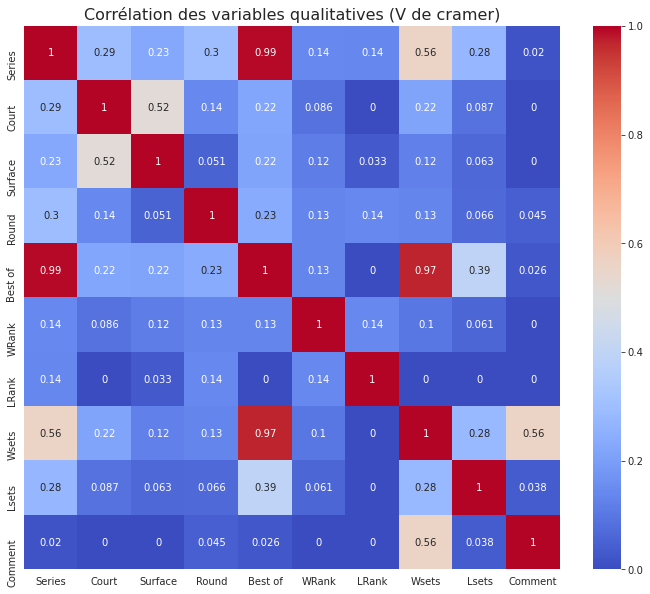

In [17]:
#matrice de corrélation
mask = np.zeros_like(df_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (12,10))
    ax = sns.heatmap(df_cramer, annot = True, cbar = True, cmap = 'coolwarm')
    plt.title('Corrélation des variables qualitatives (V de cramer)', fontsize = 16)

plt.show()

<h3> Corrélation entre toutes les variables quantitatives</h3>

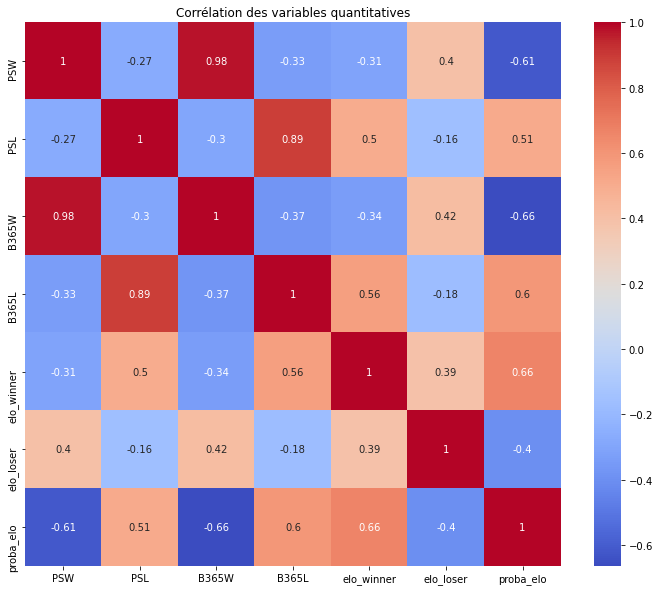

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(quantite_feats.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation des variables quantitatives")
plt.show()

<h3> Corrélation variable catégorielle <b>Winner</b> et quantitative </h3>

In [15]:
import statsmodels.api

result = statsmodels.formula.api.ols('PSW ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,8797.619050,9.796903,6.062257,0.0
Residual,32061.0,51812.142155,1.616049,NaN,NaN


In [16]:
result = statsmodels.formula.api.ols('PSL ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,307599.175069,342.538057,14.167807,0.0
Residual,32061.0,775145.545163,24.177210,NaN,NaN


In [17]:
result = statsmodels.formula.api.ols('B365W ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,7871.317685,8.765387,8.362366,0.0
Residual,38268.0,40112.314553,1.048195,NaN,NaN


In [18]:
result = statsmodels.formula.api.ols('B365L ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,148241.107633,165.079184,19.14522,0.0
Residual,38288.0,330137.322013,8.622475,NaN,NaN


In [19]:
result = statsmodels.formula.api.ols('elo_winner ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,1.065056e+09,1.186031e+06,139.919753,0.0
Residual,43809.0,3.713475e+08,8.476512e+03,NaN,NaN


In [20]:
result = statsmodels.formula.api.ols('elo_loser ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,1.315621e+08,146505.635558,8.924017,0.0
Residual,43809.0,7.192126e+08,16417.004590,NaN,NaN


In [21]:
result = statsmodels.formula.api.ols('proba_elo ~ Winner ', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Winner,898.0,609.131095,0.67832,25.694272,0.0
Residual,43809.0,1156.542118,0.02640,NaN,NaN


<hr>
<h2 style="text-decoration :underline;color:green"> 4 DATA VIZ <\h2>

<h3> Distribution de quelques variables </h3>

In [20]:
#histogramme

#*****    variable WRank     *****
p1 = figure(title="Distribution de la variable WRank", y_range = [0,7200])
p1.xaxis.axis_label="rang mondial du joueur"
p1.yaxis.axis_label="nombre de match gagné"
hist, bins_edges = np.histogram( a=df["WRank"],bins=200)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p1.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source)
hover=HoverTool(tooltips=[("rang du joueur","@x"),("nombre de match gagné","@hist")])
p1.add_tools(hover)

#*****    variable LRank     *****
p2 = figure(title="Distribution de la variable LRank", y_range = [0,7200])
p2.axis.axis_label="rang mondial du joueur"
p2.yaxis.axis_label="nombre de match gagné"
hist, bins_edges = np.histogram( a=df["LRank"],bins=200)
source = ColumnDataSource({'hist' : hist, 'x' : bins_edges[:-1]})
p2.vbar(top = 'hist', x = 'x', width = bins_edges[1]-bins_edges[0], source = source)
hover=HoverTool(tooltips=[("LRank","@x"),("match","@hist")])
p2.add_tools(hover)

#*****    variable elo_winner    *****
p3 = figure(title="Distribution de la variable elo_winner",x_range = [1300, 2400], y_range = [0,3000])
p3.xaxis.axis_label="nombre de points elo"
p3.yaxis.axis_label="nombre de match gagné"
hist, bins_edges = np.histogram( a=df["elo_winner"],bins=100)
source = ColumnDataSource({'hist' : hist, 'x' : bins_edges[:-1]})
p3.vbar(top = 'hist', x = 'x', width = bins_edges[1]-bins_edges[0], source = source)
hover=HoverTool(tooltips=[("elo winner","@x"),("match","@hist")])
p3.add_tools(hover)

#*****    variable elo_loser     *****
p4 = figure(title="Distribution de la variable elo_loser",x_range = [1300, 2400], y_range = [0,3000])
p4.xaxis.axis_label="nombre de points elo"
p4.yaxis.axis_label="nombre de match gagné"
hist, bins_edges = np.histogram( a=df["elo_loser"],bins=100)
source = ColumnDataSource({'hist' : hist, 'x' : bins_edges[:-1]})
p4.vbar(top = 'hist', x = 'x', width = bins_edges[1]-bins_edges[0], source = source)
hover=HoverTool(tooltips=[("elo loser","@x"),("match","@hist")])
p4.add_tools(hover)

#*****    variable elo_loser     *****
p5 = figure(title="Distribution de la variable proba_elo")
p5.xaxis.axis_label="probabilité de victoire qu'avait le vainqueur selon son elo"
p5.yaxis.axis_label="nombre de match"
hist, bins_edges = np.histogram(a=df["proba_elo"], bins=100)
source = ColumnDataSource({'hist' : hist, 'x' : bins_edges[:-1]})
p5.vbar(top = 'hist', x = 'x', width = bins_edges[1]-bins_edges[0], source = source)
hover=HoverTool(tooltips=[("chance de victoire","@x"),("match","@hist")])
p5.add_tools(hover)

#*****   affichage des graphiques    *****
tab1 = Panel(child=p1, title="WRank")
tab2 = Panel(child=p2, title="LRank")
tab3 = Panel(child=p3, title="elo_winner")
tab4 = Panel(child=p4, title="elo_loser")
tab5 = Panel(child=p5, title="proba_elo")

tabs = Tabs(tabs=[tab1, tab2, tab3, tab4, tab5])

show(tabs)

<p>Les victoires concernent les meilleurs joueurs rang mondiaux 1 à 30 et les defaites les joueurs un peu en dessous (30 à 60).
Le rang elo 1500 est sur représenté car il s'agit du nombre de point de départ des nouveaux joueurs. La grande majorité se trouve entre 1500 et 1700. On remarque qu'il y a tres peu de match perdu par les joueurs à plus de 2000 elo ce qui est logique. La variable proba elo montre que la plupart des matchs ont une probabilité de 50 à 70% de victoire pour le vainqueur et inversement très peu de match sont gagnés avec des proba faible (le non favori gagne moins souvent) ou des proba élevés( il y a très peu de match qui propose 90% de chance de victoire à la base).</p>

<h3> Diagramme en camembert


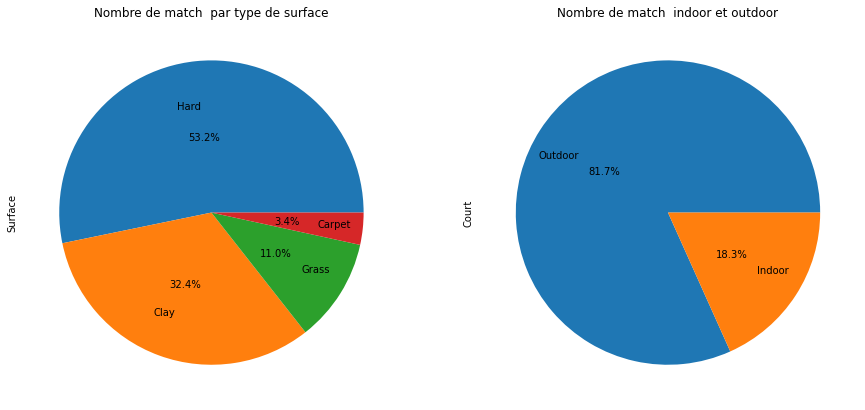

In [19]:
#graphe en camembert
plt.figure(figsize=(15,15))
plt.subplot(121)
df.Surface.value_counts().plot.pie(autopct='%1.1f%%', labeldistance=0.7,pctdistance= 0.5)
plt.title('Nombre de match  par type de surface');

plt.subplot(122)
df.Court.value_counts().plot.pie(autopct='%1.1f%%', labeldistance=0.7, pctdistance=0.5)
plt.title('Nombre de match  indoor et outdoor');
plt.show()

<p>Les matchs se jouent essentiellement sur dur et en extérieur.

<h3>Match gagné en fonction des rangs ATP dont la cote du winner est inférieure à 5 et selon la surface de jeu

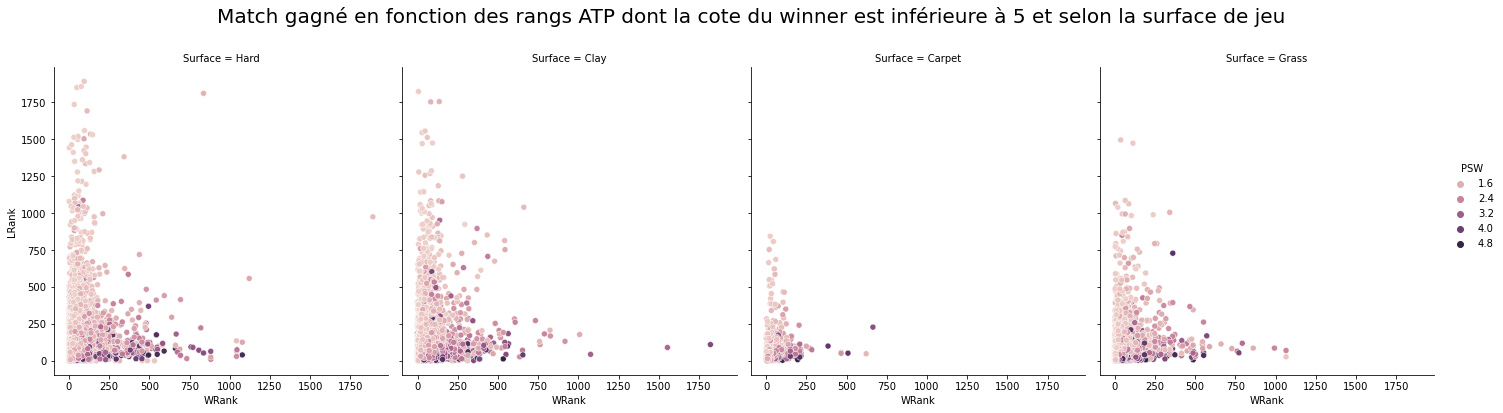

In [21]:
#nuage de point
sns.relplot(x="WRank",y="LRank",data=df[df["PSW"]<5], col="Surface", hue="PSW")
plt.suptitle("Match gagné en fonction des rangs ATP dont la cote du winner est inférieure à 5 et selon la surface de jeu ", size=20, y=1.1)
plt.xlabel("WRank")
plt.ylabel("LRank")

plt.show()

<p>Les matchs gagnés par le mieux classés ATP ont des cotes faibles. Pour obtenir une cote intéressante le gagnant doit avoir un rang mondial beaucoup plus faible que le perdant.

<h3>Match gagné en fonction des rangs ATP dont la cote du winner est supérieure à 5 et selon la surface de jeu

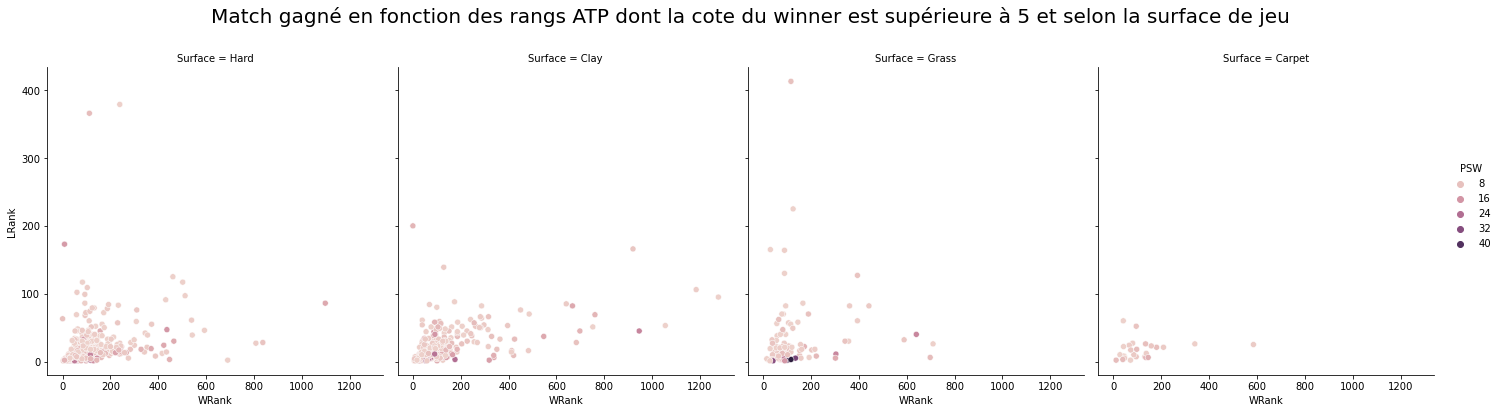

In [19]:
sns.relplot(x="WRank",y="LRank",data=df[df["PSW"]>=5], col="Surface", hue="PSW")
plt.suptitle("Match gagné en fonction des rangs ATP dont la cote du winner est supérieure à 5 et selon la surface de jeu ", size=20, y=1.1)
plt.xlabel("WRank")
plt.ylabel("LRank")

plt.show()

<p>Les matchs gagnés avec une cote supérieur à 5 montre que le gagant est généralement moins bien classé.

<h3>Match gagné en fonction des rangs elo dont la cote est inférieure à 5 et selon la surface de jeu

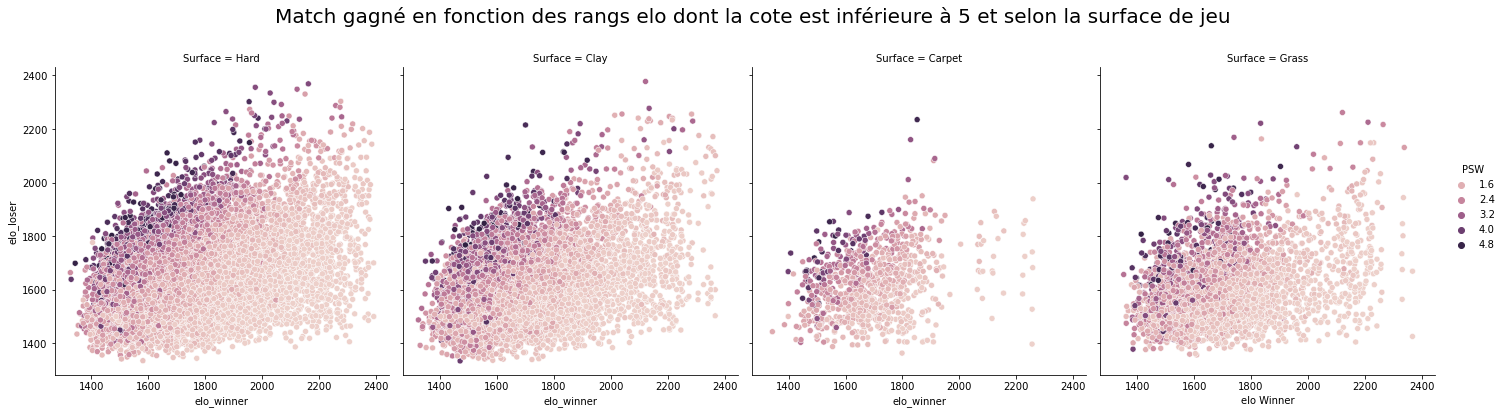

In [20]:
sns.relplot(x="elo_winner",y="elo_loser",data=df[df["PSW"]<5], col="Surface", hue="PSW")
plt.suptitle("Match gagné en fonction des rangs elo dont la cote est inférieure à 5 et selon la surface de jeu ", size=20, y=1.1)
plt.xlabel("elo Winner")
plt.ylabel("elo_Loser")
plt.show()


<p>Plus le rang elo du gagnat est élevé plus sa cote est basse. On voit très clairement si on trace une diagonal x = y  que les cotes montent des que le gagnant a moins de elo point que le perdant.

<h3>Match gagné en fonction des rangs elo dont la cote est supérieure à 5 selon la surface de jeu

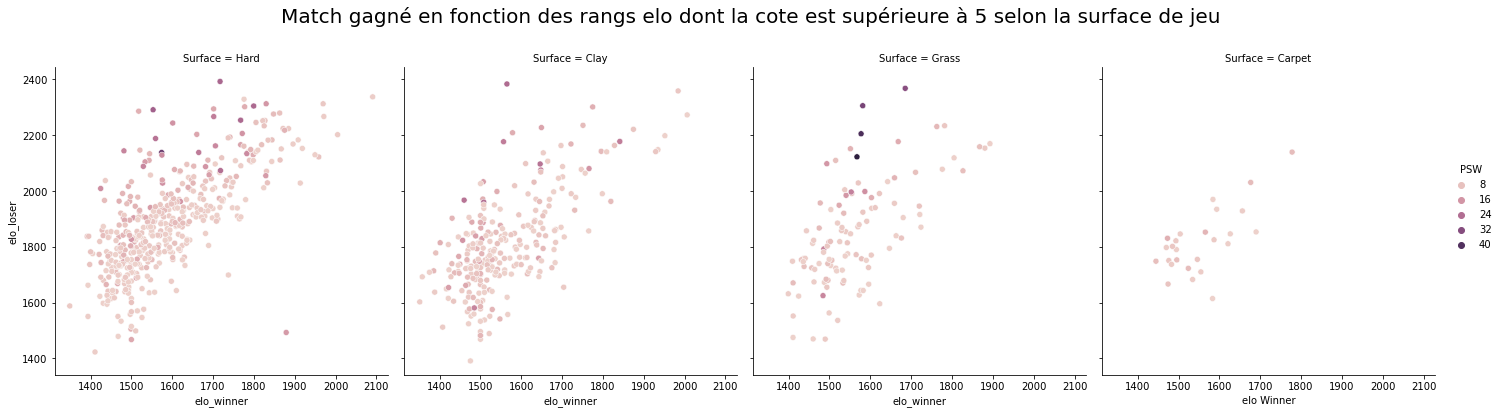

In [29]:
sns.relplot(x="elo_winner",y="elo_loser",data=df[df["PSW"]>=5], col="Surface", hue="PSW")
plt.suptitle("Match gagné en fonction des rangs elo dont la cote est supérieure à 5 selon la surface de jeu ", size=20, y=1.1)
plt.xlabel("elo Winner")
plt.ylabel("elo_Loser")
plt.show()

<p>Ces graphes illustre bien que les grosses concernent des matchs dont le gagnant a systématiquement moins de point elo que le perdant.

<h3>Cote du vainqueur en fonction de sa probabilité de victoire</h3>

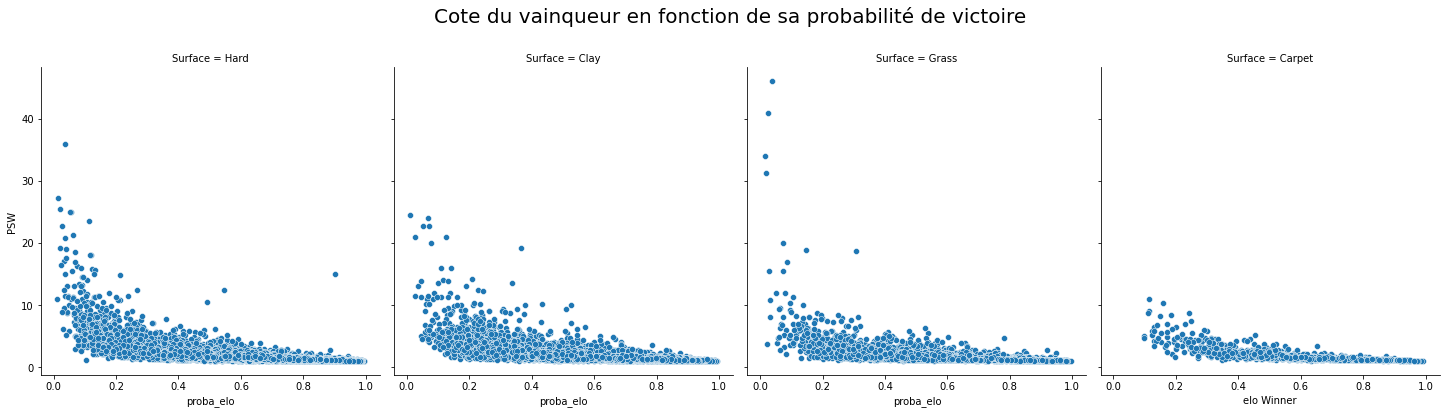

In [28]:
sns.relplot(x="proba_elo",y="PSW",data=df, col="Surface")
plt.suptitle("Cote du vainqueur en fonction de sa probabilité de victoire", size=20, y=1.1)
plt.xlabel("elo Winner")
plt.ylabel("elo_Loser")

plt.show()

<p>La cote du vainqueur diminue avec l'augmentation de sa probabilité de gagner selon son elo ce qui corrobore les graphes précédents.

<h3>Distribution des cote des match

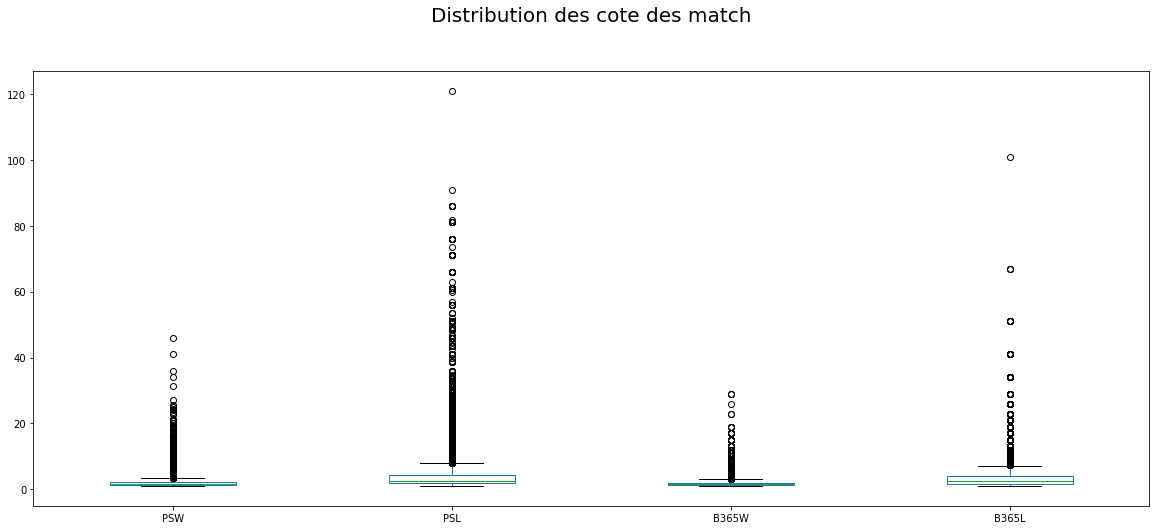

In [22]:
plt.figure(figsize=(20,8))
df.boxplot(["PSW", "PSL","B365W","B365L"], grid=False)
plt.title("Distribution des cote des match", size=20, y=1.1)
plt.show()

<p>Les cotes des matchs se situent en grande partie autour de 1 et ne varie que très peu. ON a très peu d'outlier au vu du nombre de match (+44000)

<h3>Distribution des elo rank

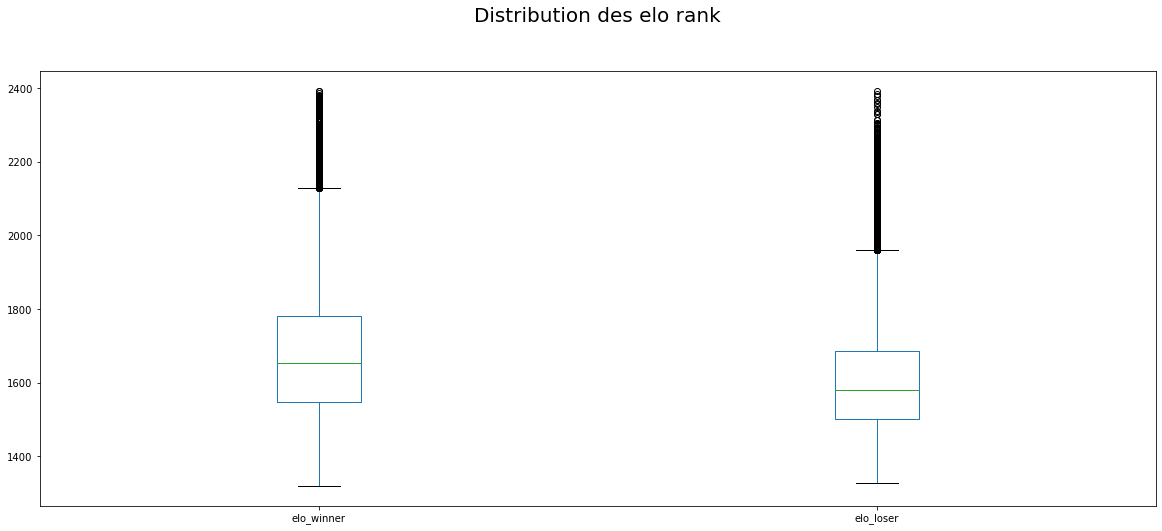

In [23]:
plt.figure(figsize=(20,8))
df.boxplot(["elo_winner","elo_loser"], grid=False)
plt.title("Distribution des elo rank", size=20, y=1.1)
plt.show()

<p>De la meme façon, on observe un regroupement de la grande majorité des joueurs autour de 1500 à 1800. ON notera les gagnants ont généralement 100 points de plus si on prend la médiane. Les outliers concernent les permiers mondiaux.

<hr>

<h2 style="text-decoration :underline;color:green"> 5 Pourcentage de bons résultats <\h2>
    
<h3>Détaillons les différents facteurs de victoires :<\h3>
    

    

<ul>
    <li>Pourcentage de victoire quand le Rang mondial est respecté</li>

In [26]:
print(f"nombre de match gagné par le mieux classé mondial :{round(df[df.WRank < df.LRank].shape[0]/df.shape[0],2)*100}%")
new = pd.DataFrame({"matchs gagnés":round(df[df.WRank < df.LRank].shape[0]/df.shape[0],2)*100},index=["meilleur rang mondial"])
victoire = pd.concat([victoire,new])
victoire

nombre de match gagné par le mieux classé mondial :66.0%


,matchs gagnés
meilleur rang mondial,66.0


<li>Pourcentage de victoire quand le elo point est respecté</li>
    

In [27]:
print(f"nombre de match gagné par le plus de elo point :{round(df[df.elo_winner > df.elo_loser].shape[0]/df.shape[0],2)*100}%")
new = pd.DataFrame({"matchs gagnés":round(df[df.elo_winner > df.elo_loser].shape[0]/df.shape[0],2)*100},index=["meilleur elo"])
victoire = pd.concat([victoire,new])
victoire

nombre de match gagné par le plus de elo point :66.0%


,matchs gagnés
meilleur rang mondial,66.0
meilleur elo,66.0


  <li>Pourcentage de victoire quand la cote de pari Pinnacle est respecté</li>
  

In [28]:
print(f"nombre de match gagné par la cote la plus faible :{round(df[df.PSW < df.PSL].shape[0]/df[df.PSW > 0].shape[0],2)*100}%")
new = pd.DataFrame({"matchs gagnés":round(df[df.PSW < df.PSL].shape[0]/df[df.PSW > 0].shape[0],2)*100},index=["cote la plus faible Pinnacle"])
victoire = pd.concat([victoire,new])
victoire

nombre de match gagné par la cote la plus faible :70.0%


,matchs gagnés
meilleur rang mondial,66.0
meilleur elo,66.0
cote la plus faible Pinnacle,70.0


  <li>Pourcentage de victoire quand la cote de pari bet365 est respecté</li>
<ul>

In [29]:
print(f"nombre de match gagné par la cote la plus faible :{round(df[df.B365W < df.B365L].shape[0]/df[df.B365W > 0].shape[0],2)*100}%")
new = pd.DataFrame({"matchs gagnés":round(df[df.B365W < df.B365L].shape[0]/df[df.B365W > 0].shape[0],2)*100},index=["cote la plus faible bet365"])
victoire = pd.concat([victoire,new])
victoire

nombre de match gagné par la cote la plus faible :69.0%


,matchs gagnés
meilleur rang mondial,66.0
meilleur elo,66.0
cote la plus faible Pinnacle,70.0
cote la plus faible bet365,69.0


<h3> Taux de victoire en fonction d'un paramètre choisi

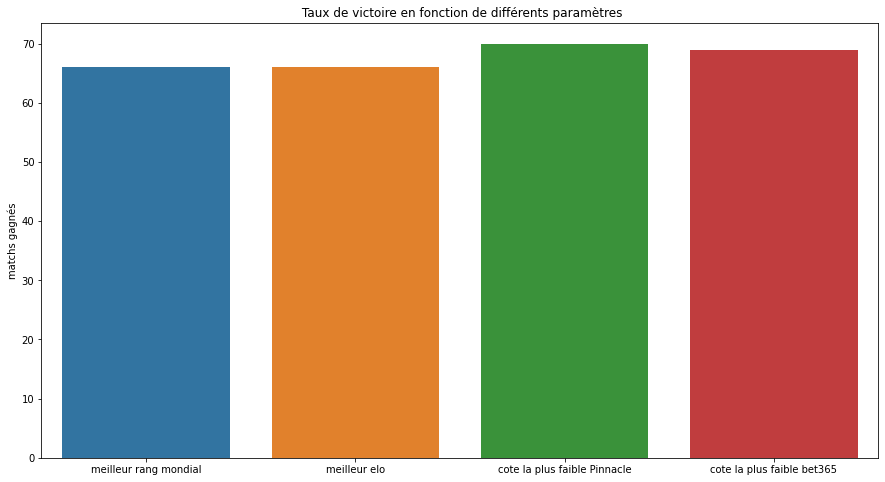

In [30]:
plt.figure(figsize=[15,8])
sns.barplot(x = victoire.index, y= victoire["matchs gagnés"])
plt.title(" Taux de victoire en fonction de différents paramètres")
plt.show()

Quelque soit la variable prise, le taux de victoire est d'environ 66% donc si on parie en suivant une de ces réglès on gagnera 2 pari sur 3. Mas cela suffit il pour gagner de l'argent.

<hr>

<h2 style="text-decoration :underline;color:green"> 6 Etude du Retour sur investissement </h2>
<h3>Parions 1 euros sur chaque match cote en suivant une règle simple :<\h3>

In [32]:
dataB365 = df[df.B365W >0]
dataB365 = dataB365.reset_index()
dataPS = df[df.PSW >0]
dataPS = dataPS.reset_index()

<li>Parions avec Bet365 toujours sur le meilleur classé mondial

In [33]:
gain = 0
argent = 0
for i in range(len(dataB365)):
    mise = 1
    if dataB365.loc[i,"WRank"]<dataB365.loc[i,"LRank"]:
        gain += mise * dataB365.loc[i,"B365W"]
        argent += mise * dataB365.loc[i,"B365W"]-1
    else:
        argent -= mise
rendement = (gain - len(dataB365)) / len(dataB365) + 1
print(f"vous avez gagné {round(argent,2)} et le rendement est de {round(rendement,2)} ")

vous avez gagné -2606.33 et le rendement est de 0.93 


<li>Parions avec Pinnacle toujours sur le meilleur classé mondial

In [34]:
gain = 0
argent = 0
for i in range(len(dataPS)):
    mise = 1
    if dataPS.loc[i,"WRank"]<dataPS.loc[i,"LRank"]:
        gain += mise * dataPS.loc[i,"PSW"]
        argent += mise * dataPS.loc[i,"PSW"]-1
    else:
        argent -= mise
rendement = (gain-len(dataPS)) / len(dataPS) +1
print(f"vous avez gagné {round(argent,2)} et le rendement est de {round(rendement,2)} ")

vous avez gagné -901.03 et le rendement est de 0.97 


<li>Parions toujours sur la plus petite cote de Bet365

In [143]:
gain = 0
argent = 0
for i in range(len(dataB365)):
    mise = 1
    if dataB365.loc[i,"B365W"]<dataB365.loc[i,"B365L"]:
        gain += mise * dataB365.loc[i,"B365W"]
        argent += mise * dataB365.loc[i,"B365W"]-1
    else:
        argent -= mise
rendement = (gain-len(dataB365))/len(dataB365)+1
print(f"vous avez gagné {round(argent,2)} et le rendement est de {round(rendement,2)} ")

vous avez gagné -2968.04 et le rendement est de 0.92 


<li>Parions toujours sur la plus petite cote de Pinnacle

In [35]:
gain = 0
argent = 0
for i in range(len(dataPS)):
    mise = 1
    if dataPS.loc[i,"PSW"]<dataPS.loc[i,"PSL"]:
        gain += mise * dataPS.loc[i,"PSW"]
        argent += mise * dataPS.loc[i,"PSW"]-1
    else:
        argent -= mise
rendement = (gain - len(dataPS))/ len(dataPS)+1
print(f"vous avez gagné {round(argent,2)} et le rendement est de {round(rendement,2)} ")

vous avez gagné -641.3 et le rendement est de 0.98 


<li>Parions toujours sur le plus gros elo avec Bet365

In [37]:
gain = 0
argent = 0
for i in range(len(dataB365)):
    mise = 1
    if dataB365.loc[i,"elo_winner"]>dataB365.loc[i,"elo_loser"]:
        gain += mise * dataB365.loc[i,"B365W"]
        argent += mise * dataB365.loc[i,"B365W"]-1
    else:
        argent -= mise
rendement = (gain - len(dataB365)) / len(dataB365) + 1
print(f"vous avez gagné {round(argent,2)} et le ROI est de {round(rendement,2)} ")

vous avez gagné -2412.73 et le ROI est de 0.94 


<li>Parions toujours sur le plus gros elo avec Pinnacle

In [38]:
gain = 0
argent = 0
for i in range(len(dataPS)):
    mise = 1
    if dataPS.loc[i,"elo_winner"]>dataPS.loc[i,"elo_loser"]:
        gain += mise * dataPS.loc[i,"PSW"]
        argent += mise * dataPS.loc[i,"PSW"]-1
    else:
        argent -= mise
rendement = (gain - len(dataPS))/ len(dataPS)+1
print(f"vous avez gagné {round(argent,2)} et le rendement est de {round(rendement,2)} ")

vous avez gagné -673.91 et le rendement est de 0.98 


<h3> Retour sur investissement selon la règle de pari choisie<\h3>

In [41]:
dico = {"pari":["Pari sur le mieux classé avec Bet365", "Pari sur le mieux classé avec Pinnacle", "Pari sur la plus faible cote avec Bet365", "Pari sur la plus faible cote avec Pinnacle","Pari sur le plus gros elo avec Bet365","Pari sur le plus gros elo avec Pinnacle"],
        "ROI": [0.93,0.97,0.92,0.98,0.93,0.97],
        "Argent":[-2606,-901,-2968,-341,-2412,-376],
        }

In [42]:
data = pd.DataFrame(dico)
data

,pari,ROI,Argent
0,Pari sur le mieux classé avec Bet365,0.93,-2606
1,Pari sur le mieux classé avec Pinnacle,0.97,-901
2,Pari sur la plus faible cote avec Bet365,0.92,-2968
3,Pari sur la plus faible cote avec Pinnacle,0.98,-341
4,Pari sur le plus gros elo avec Bet365,0.93,-2412
5,Pari sur le plus gros elo avec Pinnacle,0.97,-376


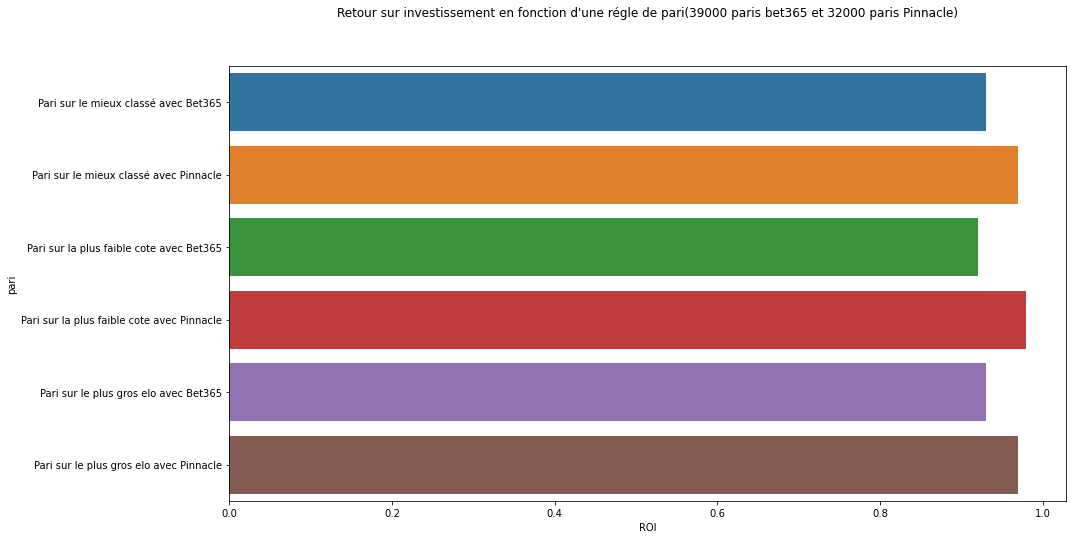

In [43]:
plt.figure(figsize=[15,8])
sns.barplot(y=data['pari'], x=data['ROI'])
plt.title("Retour sur investissement en fonction d'une régle de pari(39000 paris bet365 et 32000 paris Pinnacle)", y=1.1)
plt.show()

<h3> Gain obtenu (ou perdu) selon la règle de pari choisie<\h3>

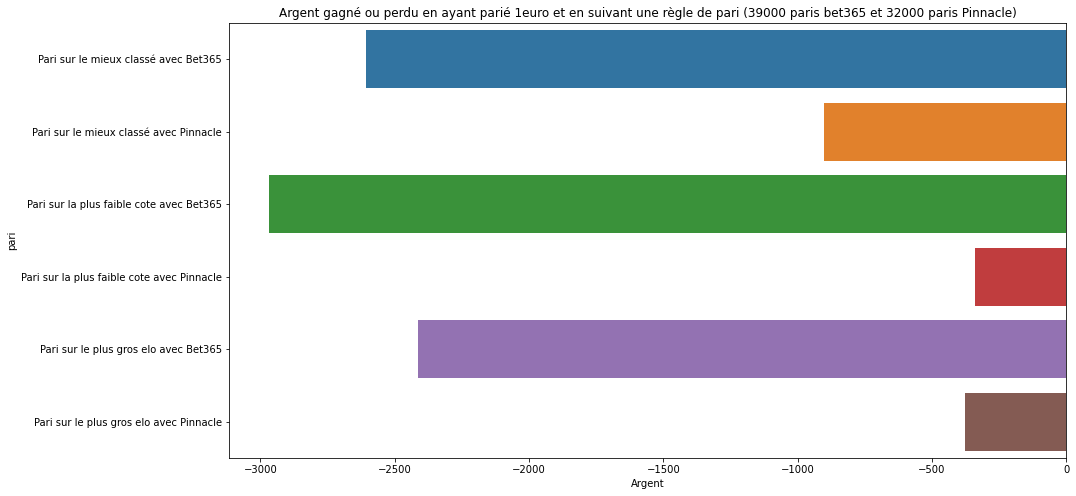

In [44]:
plt.figure(figsize=[15,8])
sns.barplot(y=data['pari'], x=data['Argent'])
plt.title("Argent gagné ou perdu en ayant parié 1euro et en suivant une règle de pari (39000 paris bet365 et 32000 paris Pinnacle)")
plt.show()

<p>Quelque soit la règle qu'on suive, on perd systématiquement de l'argent au final. On notera qu'il est plus intéressant de parier sur Pinnacle. Bet365 prend une commission beaucoup plus élevé que Pinnacle.<p>

<p>En conclusion, il va falloir trouver un moyen de passer au dessus de ces 66%-70% de prédictions de victoires mais cela ne suffira pas. Il peut être intéressant de parier sur un challenger dont la cote est plus haute et rapporte plus. L'idée va être de déterminer un facteur de risque et parier en fonction de ce dernier sur des favoris mais aussi non favoris.<p>